In [ ]:
import os 

In [ ]:
cwd = os.getcwd()
root = os.pardir
fibre = os.path.join(cwd,root,"Fiber 10")
files = os.listdir(fibre)

In [ ]:
import pandas as pd 

In [ ]:
def slope(x_init, y_init, x_final, y_final):
    if (x_final - x_init != 0):
        return (y_final - y_init)/(x_final - x_init)
    else:
        return float('inf')
        slopes = []
    


In [ ]:
def analysis(file_name):
    file = os.path.join('..',fibre, file_name)
    df = pd.read_excel(file)
    experiment = df.iloc[2:,:3]
    renaming = df.iloc[:1,:3].T.to_dict()
    experiment.rename(columns=renaming[0])
    consts = df.iloc[:,4:6].dropna().T.to_dict(orient="records")
    const = pd.DataFrame(columns=consts[0].values(), data=[consts[1].values()])
    experiment.rename(columns=renaming[0],inplace=True)
    experiment.rename(columns={"Standard force": 'Force'},inplace=True)
    slopes = []
    for i in range(len(experiment.Strain)-1):
        slopes.append(slope(experiment.Strain.iloc[i],experiment.Force.iloc[i],
                            experiment.Strain.iloc[i+1], experiment.Force.iloc[i+1]))
    ratios = []
    for index, sl in enumerate(slopes):
        if index > 4 and index <-1:
            ratio = abs((slopes[index+1] - sl)/sl)
            # print(f"{ratio} ---- {index}/{len(slopes)}")
            if ratio < 0.5 or ratio > 1.5:
                ratios.append(ratio)
            else:
                break
    pt_Strain = experiment.iloc[index]["Strain"]
    pt_Force = experiment.iloc[index]["Force"]

    sec_Strain = experiment.Strain.max()
    sec_Force = experiment[experiment["Strain"] == sec_Strain].Force.iloc[0]
    return [pt_Strain, sec_Force], [sec_Strain, sec_Force]
    # return [pt_df, sec_df]
    

In [ ]:
import numpy as np 

In [ ]:
def point_df(file_name, point):
    file = os.path.join("..",fibre,file_name)
    df = pd.read_excel(file)
    experiment = df.iloc[2:,:3]
    renaming = df.iloc[:1,:3].T.to_dict()
    experiment.rename(columns=renaming[0],inplace=True)
    print(point[0])
    data = experiment[experiment['Strain'] == point[0]]
    constants = df.iloc[:,4:].dropna()
    constants = constants.to_dict(orient="split",index=False)['data']
    const_dict = {const[0]:const[1] for const in constants}
    const_df = pd.DataFrame(columns=const_dict,data=[const_dict.values()])
    const_df['temp'] = np.ones(len(const_df))
    data['temp'] =np.ones(len(data))
    print(data.head(1))
    return pd.merge(data,const_df)
    # return experiment

In [ ]:
second_point = pd.DataFrame(columns=test.columns)


In [ ]:
second_point

In [ ]:
for fibres in os.listdir(os.path.join(root, 'data')):
    fibre = os.path.join('data',fibres)
    
    for file in os.listdir(os.path.join(cwd,'..',fibre)):
        # print(os.path.join("..",fibre,file))
        second_point = pd.concat([second_point,point_df(file, analysis(file)[0])])

In [ ]:
second_point.to_csv("../first_point.csv")

# EDA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("../first_point.csv")
X= df.iloc[:,[1,2,6,9]].dropna()

In [ ]:
X = X.sample(frac=1).reset_index(drop=True)


In [ ]:
X.iloc[:,0]

In [ ]:
plt.scatter(X.iloc[:,1], X.iloc[:,0])

MODEL TRAINING

In [5]:
#reading data
import pandas as pd 
import numpy as np 


In [6]:
df = pd.read_csv("../second_opint.csv")

In [49]:
X= df.iloc[:,[1,2,6,9]]

In [8]:
from sklearn.svm import SVR 

In [9]:
svr = SVR(kernel='linear')

In [50]:
X = X.dropna()
X = X.sample(frac=1).reset_index(drop=True)

In [22]:
X.shape

(697, 4)

In [58]:
svr.fit(X,y)

SVR(kernel='linear')

In [56]:
y =np.array(X.iloc[:487,1])
X= X.iloc[:487,1:]

In [54]:
y_test = np.array(X.iloc[487:,1])
X_test= X.iloc[487:,1:]

In [57]:
X

,Standard force,"density, g/cm^3","polymer content, %"
0,5.225857,1.79,49.335022
1,2660.815771,1.79,38.319198
2,3358.318909,1.79,45.730000
3,3126.722705,1.79,60.924780
4,3957.731323,1.79,37.964912
...,...,...,...
482,3482.368011,1.79,37.964912
483,2706.653111,1.79,34.138310
484,2981.871893,1.79,37.662338
485,1751.168506,1.82,39.120631


In [59]:
y_pred = svr.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
print(f'mean squared error:{mean_squared_error(y_pred,y_test)}')
print(f'the r2 score is : {r2_score(y_pred,y_test)}')

mean squared error:0.002205635282802303
the r2 score is : 0.9999999982275974


In [42]:
import matplotlib.pyplot as plt

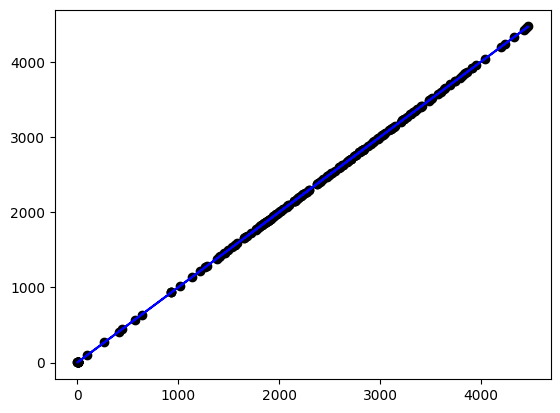

In [61]:
plt.scatter(X_test.iloc[:,0],y_test, color='black')
plt.plot(X_test.iloc[:,0], y_pred, color='blue')
plt.show()

## Random forrest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X,y)

RandomForestRegressor(max_depth=2, random_state=0)

In [63]:
y_pred = regr.predict(X_test)

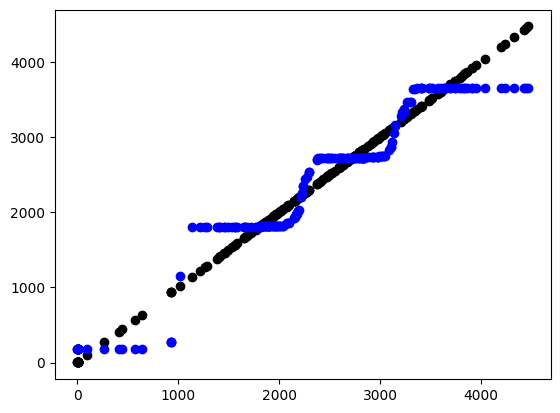

In [64]:
plt.scatter(X_test.iloc[:,0],y_test, color='black')
plt.scatter(X_test.iloc[:,0], y_pred, color='blue')
plt.show()

In [65]:
print(f'mean squared error:{mean_squared_error(y_pred,y_test)}')
print(f'the r2 score is : {r2_score(y_pred,y_test)}')

mean squared error:60082.870796342475
the r2 score is : 0.9458998872063858


# XGBoost

In [66]:
from sklearn import datasets, ensemble
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [67]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X, y)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [68]:
y_pred = reg.predict(X_test)


In [69]:
print(f'mean squared error:{mean_squared_error(y_pred,y_test)}')
print(f'the r2 score is : {r2_score(y_pred,y_test)}')

mean squared error:223.5352659386699
the r2 score is : 0.9998178362823944


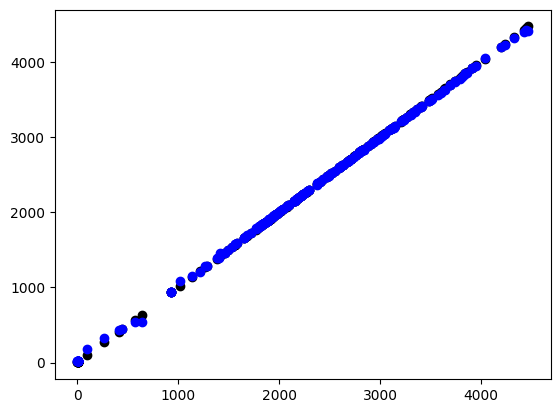

In [70]:
plt.scatter(X_test.iloc[:,0],y_test, color='black')
plt.scatter(X_test.iloc[:,0], y_pred, color='blue')
plt.show()

# Custom Ann

In [72]:
import tensorflow as tf

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:

# Assuming you have your data in variables X and y
# X is your feature matrix with shape (n_samples, 3)
# y is your target vector with shape (n_samples, )

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (important for neural networks)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

In [74]:

# Build the model
model = Sequential()

# Input layer + Hidden layer 1
model.add(Dense(64, input_dim=3, activation='relu'))

# Hidden layer 2
model.add(Dense(32, activation='relu'))

# Hidden layer 3
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\ishaa\minor\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred)  # Inverse transform to get original scale


Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6789 - val_loss: 0.1628
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1210 - val_loss: 0.0149
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101 - val_loss: 0.0045
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0017
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 - val_loss: 7.6447e-04
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7807e-04 - val_loss: 6.0514e-04
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9087e-04 - val_loss: 4.6063e-04
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5983e-04 - val_loss: 3.6702e-04
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1515e-04 - val_loss: 3.8532e-04
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7878e-04 - val_loss: 3.1340e-04
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2311e-04 - val_loss: 2.9784e-04
Epoch 12/10

In [76]:
y_pred = model.predict(X_test)
print(f'mean squared error:{mean_squared_error(y_pred,y_test)}')
print(f'the r2 score is : {r2_score(y_pred,y_test)}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
mean squared error:0.00018028804547310918
the r2 score is : 0.9998330596780957


In [77]:
X_test = pd.DataFrame(X_test)

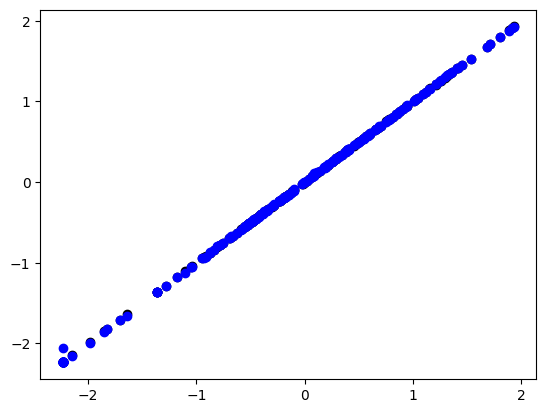

In [78]:
plt.scatter(X_test.iloc[:,0],y_test, color='black')
plt.scatter(X_test.iloc[:,0], y_pred, color='blue')
plt.show()

In [ ]:
model.summary()

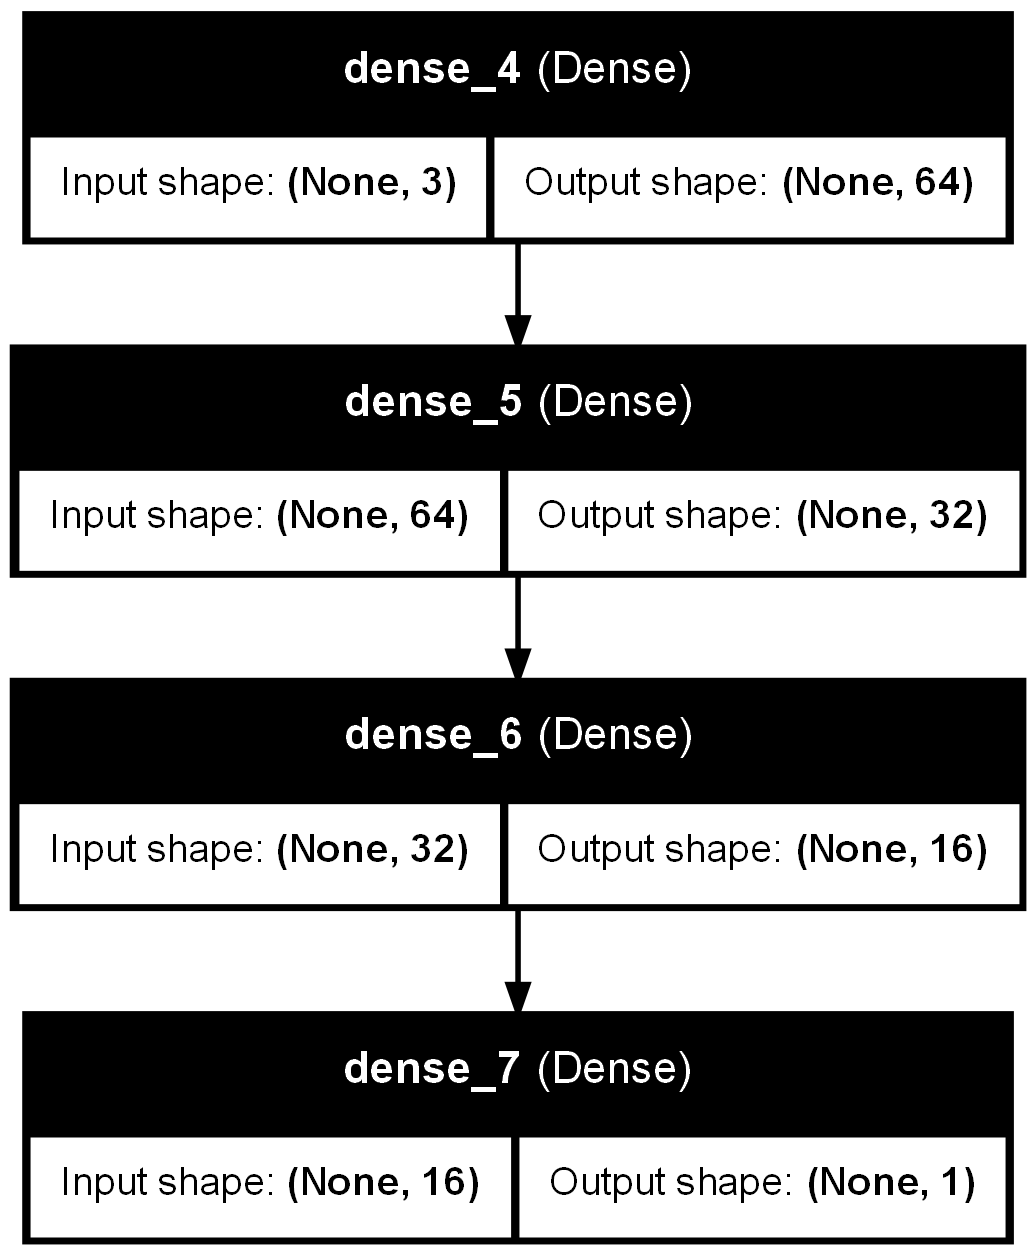

In [79]:
from tensorflow.keras.utils import plot_model
# model= load_model('./custom.h5')
# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
model.save("./custom.h5")

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
modl

In [ ]:
model.summary()